<a href="https://colab.research.google.com/github/avellar1975/puc_minas/blob/main/notebooks/Disciplina_10/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://raw.githubusercontent.com/avellar1975/puc_minas/main/img/logo.png'>

# Implementação de Algoritmos de Machine Learning
## Aplicação de Aprendizagem de Máquina

# I. Análise inicial

## Bibliotecas utilizadas

In [ ]:
# Dados numéricos e Data Frame
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler

#Gráficos
from matplotlib import pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.preprocessing import LabelEncoder as le
from sklearn.linear_model import LogisticRegression

## Leitura de Dados do módulo 01

A importação de dados é a primeira etapa em qualquer projeto de ciência de dados. Freqüentemente, você trabalhará com dados em arquivos CSV e poderá problemas no início se não observar os parâmetros da função.

A função do Pandas *read_csv()* serve para ler um arquivo csv e retornar seus valores em um **DataFrame**.

Alguns parâmetros importantes da função *read_csv()*:
```
- sep: default ',' ';'
- encoding: optional ex: encoding='latin1', encoding='iso-8859-1', encoding='utf-8'
```

### Descrição:
<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>O mercado imobiliário vem sendo objeto de diversos estudos e pesquisas nos últimos tempos. A crise financeira que afeta a economia tem afetado significativamente os investimentos e ganhos advindos deste setor. Este cenário incentiva o aumento do interesse por estudos de previsão de demanda baseados em características deste mercado, dos imóveis e do entorno destes imóveis.</p>

<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Neste contexto o objetivo principal do nosso projeto é desenvolver um sistema de avaliação imobiliária utilizando a metodologia de regressões lineares que é uma das técnicas de machine learning.</p>

<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nosso dataset é uma amostra aleatória de tamanho 5000 de imóveis disponíveis para venda no município do Rio de Janeiro.</p>

### Dados:
<ul style='font-size: 15px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (R$) de oferta do imóvel;</li>
    <li><b>Area</b> - Área do imóvel em m².</li>
</ul>

In [ ]:
arquivo1 = 'https://raw.githubusercontent.com/avellar1975/puc_minas/main/dataset/Disciplina_10/dataset.csv'
df = pd.read_csv(arquivo1, sep=';')

### Visualizar os dados

In [ ]:
df.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


### Transformando os dados
Trasnformação logarítma para normalizar os dados

In [ ]:
df['Valor'] = np.log(df['Valor'])
df['Area'] = np.log(df['Area'])

### Verificando o tamanho do dataset

In [ ]:
# 5000 linhas e 7 colunas
df.shape

(5000, 4)

## Análises Preliminares

### Estatística Descritiva

Através dos valores de médias, valores mínimos e máximos é possível verificar se há alguma discrepancia nos dados.

In [ ]:
df.describe()

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,13.694384,4.624733,3.021920,0.497160
std,0.903614,0.568679,3.170933,0.291355
min,11.225243,2.772589,0.000000,0.000331
25%,13.038982,4.248495,0.438417,0.238640
50%,13.617060,4.532599,1.476958,0.503260
75%,14.279245,4.983607,5.605379,0.747737
max,17.034386,7.600902,17.962942,0.999987


### Matriz de correlação

O coeficiente de correlação situa-se entre -1 e 1, -1 indica uma associação negativa perfeita e 1 uma associação positiva perfeita.

In [ ]:
df.corr().round(4)

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.0000,0.8012,-0.6168,-0.0366
Area,0.8012,1.0000,-0.3188,-0.0356
Dist_Praia,-0.6168,-0.3188,1.0000,0.0256
Dist_Farmacia,-0.0366,-0.0356,0.0256,1.0000


> A melhor correlação com o **Valor** é a área do imóvel (**Area**) 

## Análises Gráficas



### Plotando a variável dependente (y)

Não temos variações tão problemáticas que nos levem a encontrar algum problema no modelo.

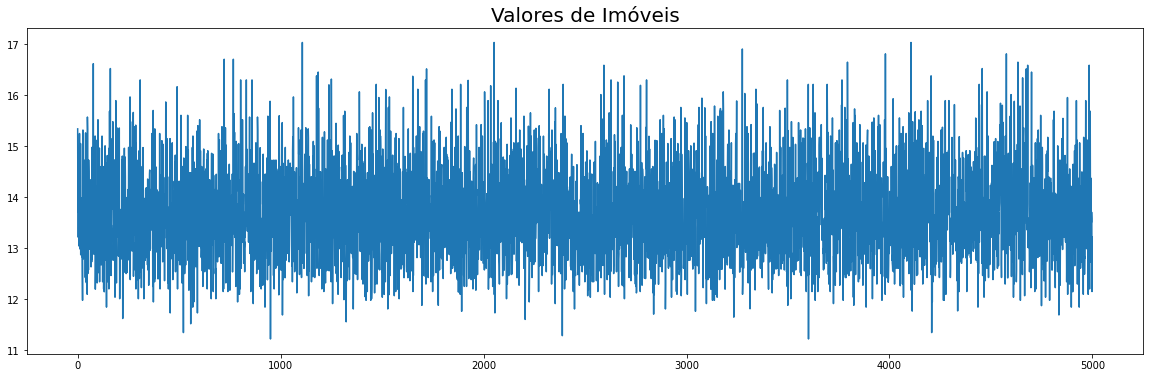

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
ax = df['Valor'].plot()
ax.set_title('Valores de Imóveis', fontsize=20)
#ax.set_ylabel('Preço do imóvel', fontsize=16)
#ax.set_xlabel('Imóveis', fontsize=16)
plt.show()

### Box Plot

Documentação do seaborn: https://seaborn.pydata.org/

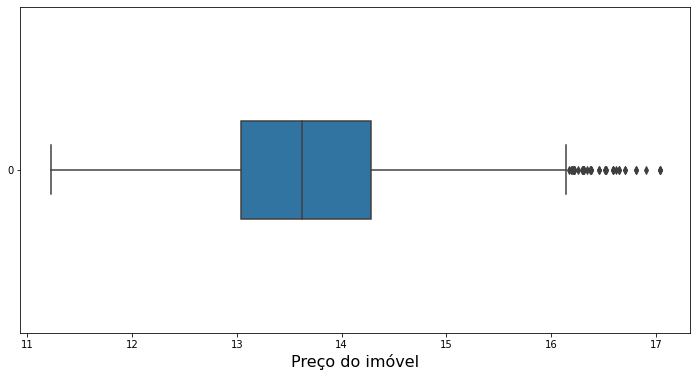

In [ ]:
ax = sns.boxplot(data=df['Valor'], orient='h', width=0.3 )
ax.set_xlabel('Preço do imóvel', fontsize=16)
ax.figure.set_size_inches(12, 6)

## Análise de Distribuição

Distribuição normal é um conceito importante em estatística e a espinha dorsal do aprendizado de máquina. Um cientista de dados precisa saber sobre distribuição normal quando trabalha com modelos lineares (funcionam bem se os dados são normalmente distribuídos), teorema do limite central e análise exploratória de dados.

Conforme descoberto por Carl Friedrich Gauss , Distribuição Normal / Distribuição Gaussiana é uma distribuição de probabilidade contínua. Possui uma curva em forma de sino que é simétrica do ponto médio até as duas metades da curva.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Text(0.5, 1.0, 'Valores de Imóveis')

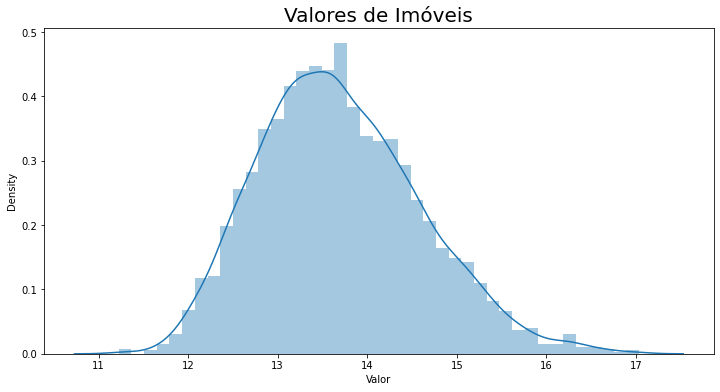

In [ ]:

ax = sns.distplot(df['Valor'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Valores de Imóveis', fontsize=20)


> Casa os dados não seguissem uma distribuição normal simétrica, seria necessário aplicar transformações dos dados para normalização antes de aplicar uma regressão linear

## Gráficos de dispersão entre as variáveis do dataset

Plota o relacionamento entre pares de variáveis em um dataset.

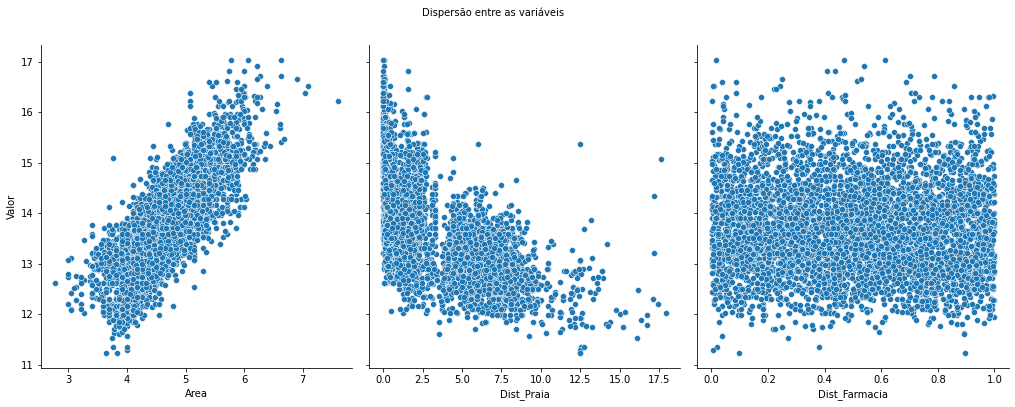

In [ ]:
ax = sns.pairplot(df, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'])
ax.figure.set_size_inches(15, 6)
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=10, y=1.05)
plt.show()

> É possível observar que a melhor variável explicativa para calcular a variável dependente é  **Area**


## Variável Dependente x Variável Explicativas (joinplot)

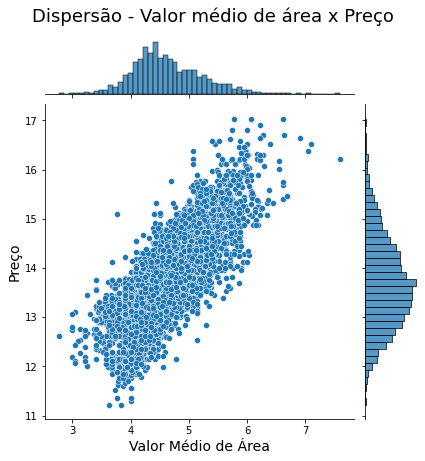

In [ ]:
ax = sns.jointplot(x='Area', y='Valor', data=df)
ax.fig.suptitle('Dispersão - Valor médio de área x Preço', fontsize=18, y=1.05)
ax.set_axis_labels('Valor Médio de Área', 'Preço', fontsize=14)
ax

# II - Módulo 01

## 1. Regressão Linear
<hr>

A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável **dependente**) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.


#### scikit-learn (https://scikit-learn.org/stable/)

O *scikit-learn* é um módulo Python especializado em soluções para *machine learning* que possui um ferramental completo para esse fim. Inicialmente, separaremos nossos dados em train e test para modelar nossa regressão e testá-la. Importaremos a função ```train_test_split``` do sckit-learn para executar esta tarefa.



#### $$y_i = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_ix_i +  \varepsilon_i$$
ou
#### $$h(\theta) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_ix_i +  \varepsilon_i$$


Onde:
- $y_i$: valor previsto.
- $i$: número de características.
- $x_i$: é o valor da $i^{th}$ característica.
- $\theta_j$ : são os parâmetros a serem determinados.
- $h(\theta)$ -  é a função hipótese que usa o modelo de parâmetros $\theta$.
- $\varepsilon_i$ - Erro ou Custo

Se trabalhamos com uma variável explicativa $x$ temos a Regressão Linear Simples, caso tenhamos um vetor $\vec{x}$ com mais de uma variável explicativa temos a Regressão Linear Multivariada

### Como treinar uma Regressão Linear?

- definir uma função que meça o quanto a hipótese consegue descrever os dados. Portanto, deve-se definir uma função erro ou custo.

- diminuir o erro da hipótese em relação aos dados.

In [ ]:
from sklearn.model_selection import train_test_split

### Variáveis dependentes e explicativas

In [ ]:
# Variável dependente
y = df['Valor']

# Variável explicativa
X = df[['Area']].values

### Criando os datasets de treino e de teste

Neste ponto, usaremos a função **train_test_split** para separar os conteúdos entre treino e teste.

Essa função possui como retorno uma lista de quatro itens, e precisamos atribuir a cada elemento da lista o conteúdo das variáveis. O primeiro item da lista é o x de treino, o segundo é o x de teste, depois y de treino e y de teste.

Configuraremos, ainda o test_size como 0.3, que se refere à quantidade de dados que usaremos para teste, então 30% dos dados serão selecionados de forma aleatória para a realização de testes do modelo, já o restante será para treino.

O próximo parâmetro é o random_state. Ao fixarmos um valor, por exemplo 42, teremos um conjunto de treino e de teste idênticos. Funciona como o seed do random.

In [ ]:
# Separando entre dados de treino e dados de testes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
X_train.shape

(3500, 1)

In [ ]:
X_test.shape

(1500, 1)

## Função de Regressão Simples

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

### Instanciando a classe LinearRegression()

In [ ]:
modelo = LinearRegression()

### Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

In [ ]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [ ]:
print(f'R² = {modelo.score(X_train, y_train).round(2)}')

R² = 0.64


### Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

In [ ]:
y_previsto = modelo.predict(X_test)
y_previsto

array([12.8307576 , 13.55552529, 13.59628733, ..., 13.66144561,
       13.01253974, 14.96027318])

### Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

In [ ]:
print(f'R² = {metrics.r2_score(y_test, y_previsto).round(2)}')

R² = 0.64


## Obtendo Previsões Pontuais

### Dados de entrada

In [ ]:
entrada = X_test[3:4]
print(f'{np.exp(entrada)} m²')

[[59.]] m²


### Gerando previsão pontual

In [ ]:
print(np.exp(modelo.predict(entrada)).round(2))

[438532.64]


### Obtendo o intercepto do modelo

O <b>intercepto</b> representa o efeito médio em $Y$ (Preço do Imóveis) tendo todas as variáveis explicativas excluídas do modelo.

### Intercepto ($\theta_0$)

In [ ]:
theta0 = modelo.intercept_.round(4)
theta0

7.8115

### Obtendo os coeficientes de regressão

Os <b>coeficientes de regressão</b> $\theta_1$ e $\theta_2$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>.

Um aspecto interessante do modelo log-linear, que o tornou muito utilizado nos trabalhos aplicados, é que os coeficientes angulares $\theta_1$ e $\theta_2$ medem as elasticidades de Y em relação a $X_1$ e $X_2$, isto é, a variação percentual de Y correspondente a uma dada variação percentual (pequena) em $X_1$ e $X_2$.

### Coeficiente ($\theta_1$)

In [ ]:
theta1 = modelo.coef_[0].round(4)
theta1

1.2703

### Definindo uma função da reta

## Análises Gráficas das Previsões do Modelo

#### Gerando as previsões do modelo para os dados de Treino

In [ ]:
y_previsto_train = modelo.predict(X_train)

#### Gráficos de dispersão entre valor estimado e valor real 

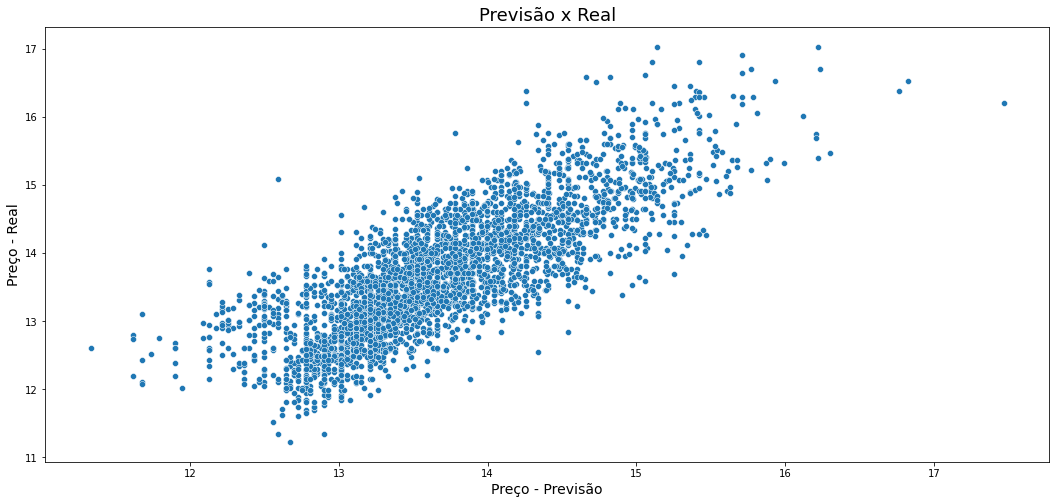

In [ ]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(18, 8)
ax.set_title('Previsão x Real', fontsize=18)
ax.set_xlabel('Preço - Previsão', fontsize=14)
ax.set_ylabel('Preço - Real', fontsize=14)
ax
plt.show()

### Visualizando nossos resultados de forma gráfica

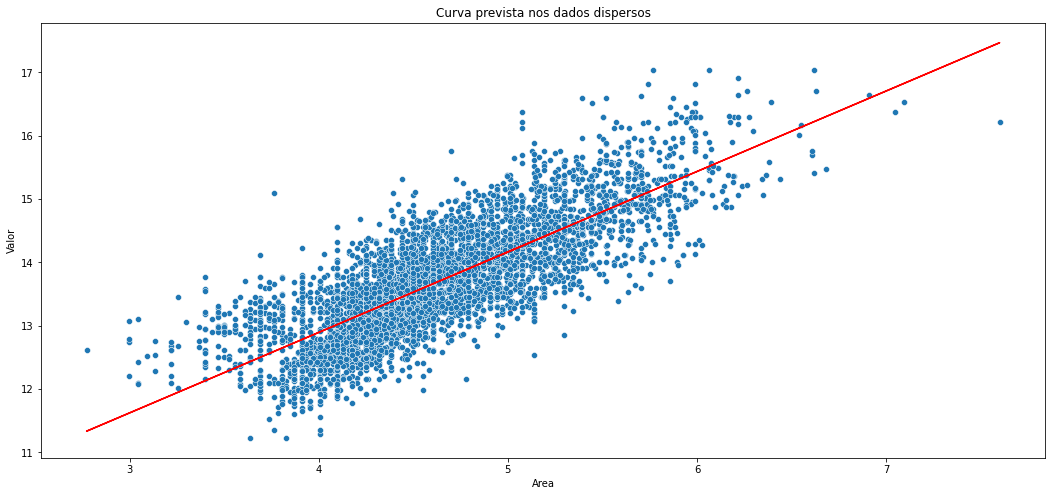

In [ ]:
ax = sns.scatterplot(x = df['Area'], y = df['Valor'])
plt.plot(X_train, y_previsto_train, color='red')
ax.figure.set_size_inches(18, 8)
ax.set_title('Curva prevista nos dados dispersos')
plt.show()

### Obtendo os resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

In [ ]:
residuo = y_train - y_previsto_train

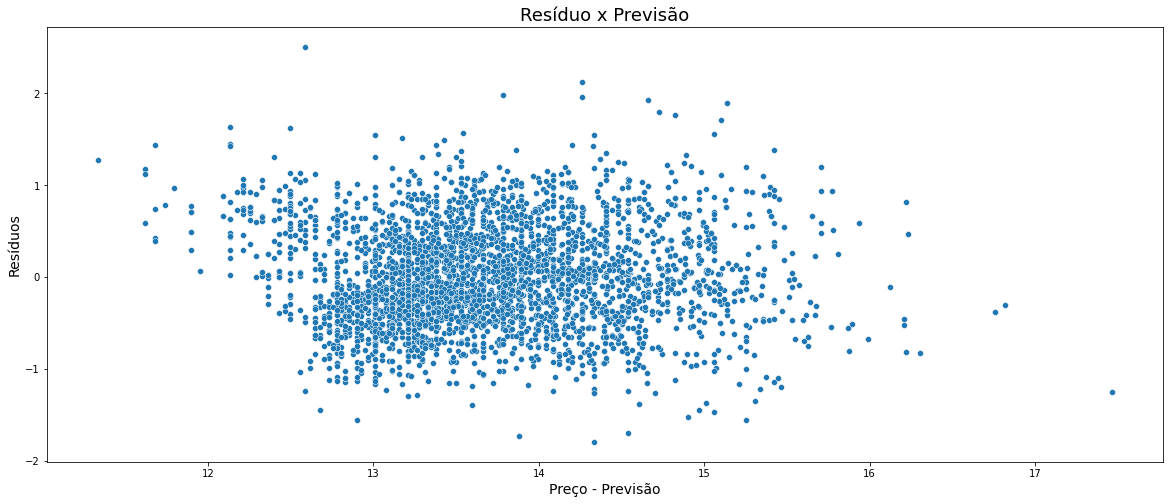

In [ ]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo)
ax.figure.set_size_inches(20, 8)
plt.plot()
ax.set_title('Resíduo x Previsão', fontsize=18)
ax.set_xlabel('Preço - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

> A média está próxima de zero, isso é um bom sinal

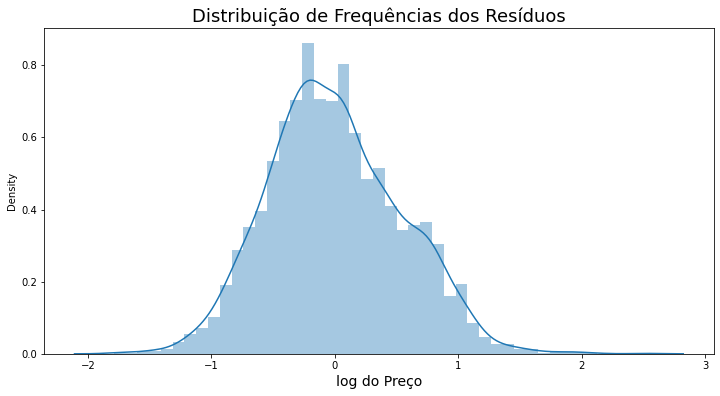

In [ ]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do Preço', fontsize=14)
ax
plt.show()

## Métricas de Regressão

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$


In [ ]:
# Erro quadrático médio
EQM = metrics.mean_squared_error(y_test, y_previsto).round(4)

# Raiz
REQM = np.sqrt(EQM).round(4)

R2 = metrics.r2_score(y_test, y_previsto).round(4)

print(f'EQM = {EQM}')
print(f'Raiz do MSE = {REQM}')
print(f'R² = {R2}')

print(f'theta0 = {theta0}')
print(f'theta1 = {theta1}')

EQM = 0.2933
Raiz do MSE = 0.5416
R² = 0.6394
theta0 = 7.8115
theta1 = 1.2703


## 2. Função de custo (cost function) 

É a função objetivo que serve de base para que os modelos busquem os
parâmetros ($\theta_0, \theta_1$) que mais se aproximam dos dados de treino

## $$J(\theta) = \frac{1}{2m}\sum^m_{i=1}(h_\theta(x_i) - y_i)^2$$

Onde:
- $\theta$ - parâmetro dos modelos, representado como vetor. Ex.: $\theta = [\theta_0, \theta_1]$
- $m$ - quantidade de amostras (linhas)
- $x$ - variável independente
- $h\theta$ - valor estimado com parâmetros
- $y$ - variável dependente
- $J(\theta)$ - erro associado dos estimadores em comparação com os valores reais

<img src='https://raw.githubusercontent.com/avellar1975/puc_minas/main/img/cost_function.jpeg'>

Uma boa função de custo retorna valores altos para previsões ruins e valores baixos para previsões boas.

> Para aprender como utilizar LATEX no Jupyter Notebook:

https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd

### Criando uma Função de Custo

É utilizada na função abaixo uma list-comprehensions do Python

```[expr for item in lista]```

Para saber mais: 
https://pythonacademy.com.br/blog/list-comprehensions-no-python



In [ ]:
# Representação da fórmula da Função de Custo
def funcao_custo(theta0, theta1, X, y):
    m = len(X)
    elem = list(range(1,m))
    J = (1/2*m) * sum([(theta0 + theta1*X[i]) - y[i] for i in elem]) ** 2
    return J

In [ ]:
funcao_custo(theta0 ,theta1, X, y)

array([4010474.36765411])

## 2. Regressão linear com o Gradiente descendente

## 3. Regressão linear univariável

# Modulo 2

## Regressão linear multivariável

### Variáveis dependentes e explicativas

In [ ]:
# Variável dependente
y = df['Valor']

# Variável explicativa
X = df[['Area', 'Dist_Praia']].values

### Separando base de treino e base de teste

In [ ]:
# Separando entre dados de treino e dados de testes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print('Base de treino',X_train.shape, y_train.shape)
print('Base de teste',X_test.shape, y_test.shape)

Base de treino (3500, 2) (3500,)
Base de teste (1500, 2) (1500,)


### Gerando o modelo

In [ ]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Coeficiente R²
print(f'R² = {modelo.score(X_train, y_train).round(2)}')

R² = 0.79


### Gerando previsões a partir da base de teste

In [ ]:
y_previsto = modelo.predict(X_test)

### Coeficiente das previsões

In [ ]:
print(f'R² = {metrics.r2_score(y_test, y_previsto).round(2)}')

R² = 0.79


In [ ]:
theta0 = modelo.intercept_.round(4)
theta0

9.0998

In [ ]:
theta1 = modelo.coef_[0].round(4)
theta1

1.067

In [ ]:
# Erro quadrático médio
EQM = metrics.mean_squared_error(y_test, y_previsto).round(4)

# Raiz
REQM = np.sqrt(EQM).round(4)

R2 = metrics.r2_score(y_test, y_previsto).round(4)

print(f'EQM = {EQM}')
print(f'Raiz do MSE = {REQM}')
print(f'R² = {R2}')

print(f'theta0 = {theta0}')
print(f'theta1 = {theta1}')

EQM = 0.1743
Raiz do MSE = 0.4175
R² = 0.7858
theta0 = 9.0998
theta1 = 1.067


In [ ]:
#ax = sns.scatterplot(y = df['Valor'], hue=df[['Area','Dist_Praia']])
#plt.plot(X_train, y_previsto_train, color='red')
ax.figure.set_size_inches(18, 8)
ax.set_title('Curva prevista nos dados dispersos')
plt.show()

## Regressão logística

## Função de ativação Sigmoid

# Módulo 3

## Bias x Variance

## Overfitting

## Regularização

## Métricas de modelo

# Módulo 4

## A anatomia das redes neurais

## Gradiente descendente e Backpropagation

## Batch-learning, mini-batch e stochastic learning

## Tipos de funções de ativação

## CNN

## Aplicações e perspectiva

In [ ]:
class MachineLearningPipeline:
  def __init__(self,df):
    self.df = df
  
  def dataCleaning(self):
    self.df.dropna()

  def selectColumn(self):
    self.X = self.df[['fixed acidity']].values
    self.y = self.df['quality'].values
    
  
  def trainTestSplit(self):
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=0)
  

In [ ]:
pipeline = MachineLearningPipeline(wine_df)
pipeline.dataCleaning()
pipeline.selectColumn()
pipeline.trainTestSplit()

NameError: ignored

# Regressão Univariável

In [ ]:
pipeline.df[['fixed acidity','quality']]

In [ ]:
plt.scatter(pipeline.X,pipeline.y)
plt.title('Pontos de preço de imóveis por média salarial regional')
plt.xlabel('Média salarial')
plt.ylabel('Preço imóvel')
plt.show()

In [ ]:
def plot_regression_line(x, y, theta0, theta1):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = theta0 + theta1*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()

In [ ]:
plot_regression_line(pipeline.X,pipeline.y,0,2)

In [ ]:
plot_regression_line(pipeline.X,pipeline.y,0,20)

In [ ]:
def funcao_custo(theta0, theta1, X, y):
  m = len(X)
  elem = list(range(1,m))
  J = (1/2*m) * sum([(theta0 + theta1*X[i]) - y[i] for i in elem]) ** 2
  return J

In [ ]:
def hypothesis(theta0, theta1, X):
    return theta0 + theta1*X

In [ ]:
def gradient_descent(X, y, alpha, num_iteracoes):
  theta0 = 0
  theta1 = 0

  m = len(y)
  errors = []
  for i in range(0,num_iteracoes):
    h_theta = hypothesis(theta0, theta1, X)
    theta0 -= alpha*(sum(h_theta-y))/m
    theta1 -= alpha * (np.sum((h_theta - y) * X)/m)
    errors.append(funcao_custo(theta0, theta1, X, y))
  return theta0, theta1, errors

In [ ]:
result = gradient_descent(np.log(pipeline.X), np.log(pipeline.y), 0.00025, 60)

In [ ]:
plot_regression_line(np.log(pipeline.X), np.log(pipeline.y),result[0],result[1])

In [ ]:
plt.plot(result[2], color = "g")

In [ ]:
result = gradient_descent(np.log(pipeline.X), np.log(pipeline.y), 0.001, 50)

In [ ]:
plt.plot(result[2], color = "g")